# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install Tensorflow Object Detection

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e .

100% [..........................................................................] 1468733 / 1468733

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detecti

E:\CN5\AIP\ANPR\TFODCourse\tfod\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
E:\CN5\AIP\ANPR\TFODCourse\tfod\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack
error: numpy 1.24.2 is installed but numpy<1.23.0,>=1.14.3 is required by {'apache-beam'}


Obtaining file:///E:/CN5/AIP/ANPR/TFODCourse/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [9]:
!pip list

Package                       Version      Editable project location
----------------------------- ------------ ----------------------------------------------------------
absl-py                       1.4.0
apache-beam                   2.45.0
asttokens                     2.2.1
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cachetools                    5.3.0
certifi                       2022.12.7
charset-normalizer            3.0.1
click                         8.1.3
colorama                      0.4.6
comm                          0.1.2
contextlib2                   21.6.0
contourpy                     1.0.7
cycler                        0.11.0
Cython                        0.29.33
debugpy                       1.6.6
decorator                     5.1.1
dm-tree                       0.1.8
easyocr                       1.6.2
etils                         1.0.0
executing                     1.2.0
flatbuffers                

In [10]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-03-19 20:25:10.198060: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-03-19 20:25:10.198871: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 20:25:21.763912: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-03-19 20:25:21.764605: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-03-19 20:25:21.765243: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-03-19 20:25:21.765906: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [8]:
# !pip install tensorflow==2.9.1 tensorflow-gpu==2.9.1 --upgrade

  Using cached tensorflow-2.9.1-cp310-cp310-win_amd64.whl (444.1 MB)
  Using cached tensorflow_gpu-2.9.1-cp310-cp310-win_amd64.whl (444.1 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.21
    Uninstalling flatbuffers-23.1.21:
      Successfully uninstalled flatbuffers-23.1.21
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Uninstalling tensorflow-estimator-2.10.0:
      Successfully uninstalled tensorflow-estimator-2.10.0
  Attempting uninstall: tensorboard
    Found existing installation: 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.11.3 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.11.3 requires immutabledict, which is not installed.
tf-models-official 2.11.3 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.11.3 requires oauth2client, which is not installed.
tf-models-official 2.11.3 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.11.3 requires sentencepiece, which is not installed.
tf-models-official 2.11.3 requires seqeval, which is not installed.
tf-models-official 2.11.3 requires tensorflow-datasets, which is not installed.
tf-models-official 2.11.3 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.11.3 requires tensorflow-model-optimization>=0.4.1, which is not installed.
tf-models-official 2.11.3 require

In [11]:
# !pip install tf-models-official==2.9.1

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
      --------------------------------------- 0.0/2.1 MB 660.6 kB/s eta 0:00:04
     - -------------------------------------- 0.1/2.1 MB 656.4 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 901.1 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/2.1 MB 1.3 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.1 MB 1.2 MB/s eta 0:00:02
     ------- -------------------------------- 0.4/2.1 MB 1.5 MB/s eta 0:00:02
     ----------- ---------------------------- 0.6/2.1 MB 1.9 MB/s eta 0:00:01
     --------------- ------------------------ 0.8/2.1 MB 2.2 MB/s eta 0:00:01
     ------------------------ --------------- 1.3/2.1 MB 3.2 MB/s eta 0:00:01
     -------------------------------------- - 2.0/2.1 MB 4.4 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 4.5 MB/s eta 0:00:00
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.45.0 requires cloudpickle~=2.2.1, which is not installed.
apache-beam 2.45.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.45.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.45.0 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.45.0 requires fasteners<1.0,>=0.3, which is not installed.
apache-beam 2.45.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.45.0 requires objsize<0.7.0,>=0.6.1, which is not installed.
apache-beam 2.45.0 requires orjson<4.0, which is not installed.
apache-beam 2.45.0 requires proto-plus<2,>=1.7.1, which is not installed.
apache-beam 2.45.0 requires pyarrow<10.0.0,>=0.15.1, which is not installed.
apache-beam 2.45.0 requires pydot<2,>=1.2.0, which is not installed.
apache-beam 2.45.0 requires pymo

In [ ]:
# pip install protobuf==3.20.*

In [ ]:
# pip install scipy

In [ ]:
# pip install tensorflow_io

In [ ]:
# # !pip uninstall protobuf matplotlib -y
# # !pip install protobuf matplotlib==3.2

In [26]:
# pip install matplotlib

In [ ]:
# pip install tf-models-official

In [ ]:
# pip install pyyaml

In [ ]:
# pip install gin-config==0.1.1

In [ ]:
# pip install tensorflow-addons

In [ ]:
!pip list

In [11]:
import object_detection

In [12]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [8]:
labels = [{'name':'plate', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [15]:
# pip install wheel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# pip install pandas

  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.11.3 requires Cython, which is not installed.
tf-models-official 2.11.3 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.11.3 requires immutabledict, which is not installed.
tf-models-official 2.11.3 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.11.3 requires oauth2client, which is not insta

In [14]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']} #tensorflow/scripts

In [15]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [16]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [17]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [9]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [19]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [20]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [21]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [22]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [23]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [24]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [ ]:
!{command}

# 7. Evaluate the Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [6]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [36]:
tf.config.list_physical_devices('GPU')

[]

In [37]:
# Prevent GPU complete consumption
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RunTimeError as e:
        print(e)

In [10]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [11]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [95]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [216]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'boderngoaigiao11.jpg')

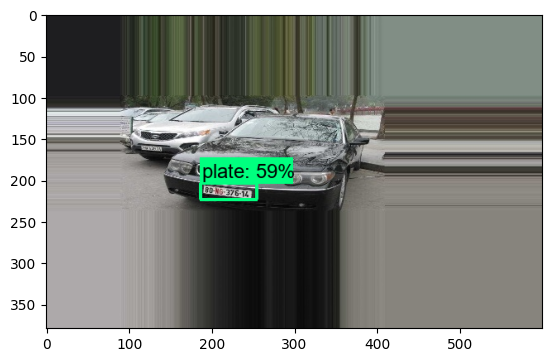

In [217]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=0.3,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [173]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

# Apply OCR to Detection

In [17]:
!pip install easyocr

In [18]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [19]:
import easyocr

In [195]:
detection_threshold = 0.7

In [188]:
detection_threshold

0.3

In [204]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [205]:
scores

[0.5428091]

In [208]:
boxes

array([[0.        , 0.01300156, 0.96677446, 1.        ]], dtype=float32)

In [115]:
detections['detection_scores']

array([0.72644705, 0.39619368, 0.2589579 , 0.13920607, 0.09526161,
       0.08878198, 0.08034267, 0.07747848, 0.07291017, 0.07168835,
       0.0695473 , 0.06605495, 0.06500655, 0.06457421, 0.06312253,
       0.06256789, 0.06195202, 0.06113651, 0.05926698, 0.05877585,
       0.05816663, 0.0560337 , 0.05339651, 0.05296801, 0.05274433,
       0.05139481, 0.05118872, 0.05099213, 0.05020824, 0.04781014,
       0.04727312, 0.04690282, 0.04642686, 0.04521098, 0.04283914,
       0.04282596, 0.04177066, 0.04134063, 0.04104197, 0.04045436,
       0.04030668, 0.04024854, 0.03968953, 0.0394492 , 0.03934873,
       0.0388973 , 0.03884071, 0.0386988 , 0.0382889 , 0.03824503,
       0.03799187, 0.03753732, 0.03738288, 0.03686223, 0.03685942,
       0.03679628, 0.03673402, 0.03668166, 0.03613602, 0.0356762 ,
       0.03562464, 0.03556698, 0.03477617, 0.03471659, 0.03435204,
       0.03420006, 0.03394811, 0.03346515, 0.03342452, 0.03324805,
       0.03277688, 0.03260704, 0.03225735, 0.03198924, 0.03191

In [206]:
width = image.shape[1]
height = image.shape[0]

In [117]:
width, height

(600, 379)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.         0.01300156 0.96677446 1.        ]
[  0.          12.39048779 543.32724857 953.        ]
[]


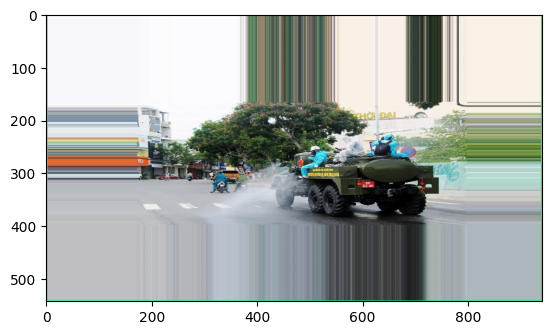

In [207]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [211]:
ocr_result

[]

In [27]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][1], result[0][0])))

65.87990081235043
77.62215948813468


# OCR Filtering

In [28]:
region_threshold = 0.05

In [29]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = []
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
            
    return plate

In [30]:
filter_text(region, ocr_result, region_threshold)

['[80 NG;', '37614']

# Bring it together

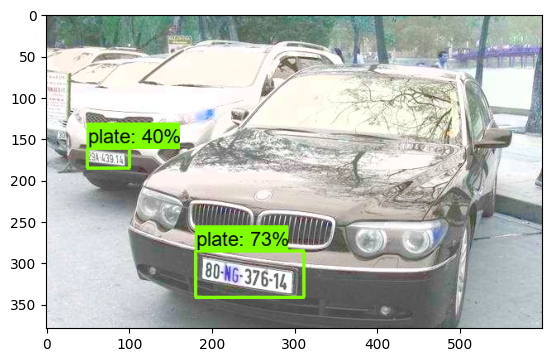

In [31]:
plt.imshow(image_np_with_detections)

In [32]:
region_threshold = 0.05

In [33]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threshold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


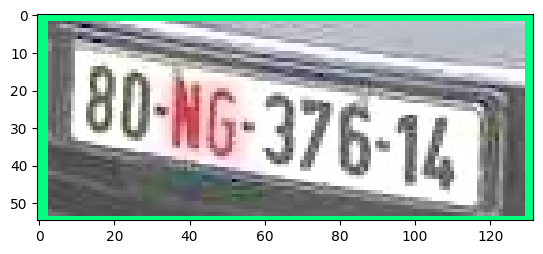

['[80 NG;', '37614']


In [34]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

# Save Results

In [47]:
import csv
import uuid

In [48]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [51]:
region

array([[[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [ 16,  17,  31],
        [127, 255,   0],
        [127, 255,   0]],

       ...,

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [  0,   0,   3],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [ 44,  45,  49],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]]

In [52]:
save_results(text, region, 'detection_result.csv', 'Detection_Images')

In [ ]:
detection_threshold = 0.3

In [252]:
detection_threshold = 0.3

# Create a list to store predictions
preds = []
y_pred_list = []

# Loop through test images
test_images_path = os.path.join(paths['IMAGE_PATH'], 'test')
for filename in os.listdir(test_images_path):
    if filename.endswith('.jpg'):
        # Load the image
        image_path = os.path.join(test_images_path, filename)
        img = cv2.imread(image_path)
        image_np = np.array(img)

        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()

        viz_utils.visualize_boxes_and_labels_on_image_array(
                    image_np_with_detections,
                    detections['detection_boxes'],
                    detections['detection_classes']+label_id_offset,
                    detections['detection_scores'],
                    category_index,
                    use_normalized_coordinates=True,
                    max_boxes_to_draw=5,
                    min_score_thresh=0.3,
                    agnostic_mode=False)
        
        image = image_np_with_detections
        scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
        boxes = detections['detection_boxes'][:len(scores)]
        classes = detections['detection_classes'][:len(scores)]

        width = image.shape[1]
        height = image.shape[0]

        # Save predictions to the list
        for i in range(len(scores)):
            pred = {}
            pred['image_path'] = image_path
            pred['score'] = scores[i]
            if pred['score'] == sc: print(pred['image_path'])
            pred['box'] = boxes[i]*[height, width, height, width]
            preds.append(pred)
            y_pred_list.append(np.array(pred['box']).astype(int))

Tensorflow\workspace\images\test\xemayBigPlate204.jpg


In [138]:
import pandas as pd
import numpy as np

In [235]:
# Save predictions
df_preds = pd.DataFrame(preds)
sc = df_preds['score'].max()
sc

0.95811975

In [259]:
row_with_max_value = df_preds.loc[df_preds['score'] == sc]
row_with_max_value

,image_path,score,box
1241,Tensorflow\workspace\images\test\xemayBigPlate...,0.95812,"[166.45174026489258, 162.36999034881592, 400.1..."


In [251]:
display(row_with_max_value['image_path'].to_string)

<bound method Series.to_string of 1241    Tensorflow\workspace\images\test\xemayBigPlate...
Name: image_path, dtype: object>

In [152]:
df_preds = pd.DataFrame(pred)
df_preds

,0,1,2,3
0,204,186,223,255
1,629,328,674,481
2,233,156,262,271
3,193,272,210,331
4,307,241,333,314
...,...,...,...,...
1327,208,187,348,387
1328,0,0,421,535
1329,0,0,406,600
1330,165,172,353,453


# Performance

In [159]:
import xml.etree.ElementTree as ET
import numpy as np

In [132]:
def parse_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Extract bounding box information
    y_true = []
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        y_true.append(ymin)
        y_true.append(xmin)
        y_true.append(ymax)
        y_true.append(xmax)
        break
    
    return y_true

In [277]:
xml_folder = os.path.join(paths['IMAGE_PATH'], 'test')
y_true_list = []

# Duyệt qua tất cả các file xml trong thư mục xml_folder
for filename in os.listdir(xml_folder):
    if filename.endswith('.xml'):
        # Sử dụng parse_xml để lấy thông tin y_true từ file xml
        xml_path = os.path.join(xml_folder, filename)
        y_true = parse_xml(xml_path)
        
        # Thêm y_true vào list y_true_list
        y_true_list.append(y_true)

In [258]:
df_true = pd.DataFrame(y_true_list)
df_true

,0,1,2,3
0,154,154,402,496
1,154,154,402,496
2,154,154,402,496
3,154,154,402,496
4,154,154,402,496
...,...,...,...,...
1099,154,154,402,496
1100,154,154,402,496
1101,154,154,402,496
1102,154,154,402,496


In [254]:
df_train = pd.DataFrame(train_list)
df_train

,0,1,2,3
0,135,252,144,302
1,173,262,210,384
2,69,75,75,85
3,76,57,84,94
4,341,519,381,639
...,...,...,...,...
7188,201,114,310,275
7189,217,181,333,337
7190,225,165,347,335
7191,219,205,314,340


In [278]:
def compute_iou(y_true, y_pred):
    # Tính toán diện tích của intersection
    intersection_area = max(min(y_true[2], y_pred[2]) - max(y_true[0], y_pred[0]), 0) * max(min(y_true[3], y_pred[3]) - max(y_true[1], y_pred[1]), 0)

    # Tính toán diện tích của union
    union_area = (y_true[2] - y_true[0]) * (y_true[3] - y_true[1]) + (y_pred[2] - y_pred[0]) * (y_pred[3] - y_pred[1]) - intersection_area

    # Tính toán IoU
    iou = intersection_area / union_area if union_area > 0 else 0

    return iou, intersection_area

In [275]:
ious = []
iou = compute_iou(y_true_list[1],y_pred_list[1241])
iou

(0.9139128604504315, 78156, 85518)

In [279]:
ious = []
for i in range(len(y_true_list)):
    iou = compute_iou(y_true_list[i],y_pred_list[i])
    ious.append(iou)

In [270]:
df_true = pd.DataFrame(ious)
df_true.max()

0    0.907029
dtype: float64

In [224]:
def compute_iou(boxA, boxB):
    # Tính toán toạ độ của điểm giao của 2 bounding box
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Tính toán diện tích của intersection
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # Tính toán diện tích của cả 2 bounding box
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # Tính toán diện tích của union
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

def compute_accuracy(y_true_list, y_pred_list, iou_threshold):
    tp = 0
    fp = 0
    fn = 0
    accuracy_ = 

    for i in range(len(y_true_list)):
        y_true = y_true_list[i]
        y_pred = y_pred_list[i]

        iou = compute_iou(y_true, y_pred)

        if iou >= iou_threshold:
            tp += 1
        else:
            fp += 1
            fn += 1

        accuracy = tp / float(tp + fp + fn)

        accuracy_.append(accuracy)
    return accuracy_

In [230]:
iou_threshold = 0.05
accur = compute_accuracy(y_true_list, y_pred_list, iou_threshold)
accur

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.7142857142857143,
 0.5555555555555556,
 0.45454545454545453,
 0.38461538461538464,
 0.3333333333333333,
 0.29411764705882354,
 0.2631578947368421,
 0.23809523809523808,
 0.21739130434782608,
 0.2,
 0.18518518518518517,
 0.1724137931034483,
 0.16129032258064516,
 0.15151515151515152,
 0.14285714285714285,
 0.13513513513513514,
 0.1282051282051282,
 0.12195121951219512,
 0.11627906976744186,
 0.1111111111111111,
 0.10638297872340426,
 0.10204081632653061,
 0.09803921568627451,
 0.09433962264150944,
 0.09090909090909091,
 0.08771929824561403,
 0.0847457627118644,
 0.08196721311475409,
 0.07936507936507936,
 0.07692307692307693,
 0.07462686567164178,
 0.07246376811594203,
 0.07042253521126761,
 0.0684931506849315,
 0.06666666666666667,
 0.06493506493506493,
 0.06329113924050633,
 0.06172839506172839,
 0.060240963855421686,
 0.058823529411764705,
 0.05747126436781609,
 0.056179775280898875,
 0.054945054945054944,
 0.053763440860215055,
 0.05263157894736842,


In [229]:
model_accuracy = sum(accur) / len(accur)
model_accuracy

0.11770589949117273

# 10. Real Time Detections from your Webcam

In [19]:
!pip uninstall opencv-python-headless -y

In [20]:
pip install opencv-contrib-python==4.5.5.62

  Using cached opencv_contrib_python-4.5.5.62-cp36-abi3-win_amd64.whl (42.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


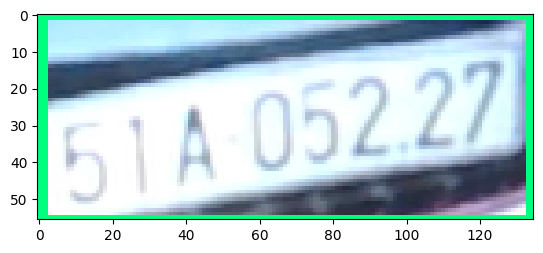

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['052.27,', '6A']


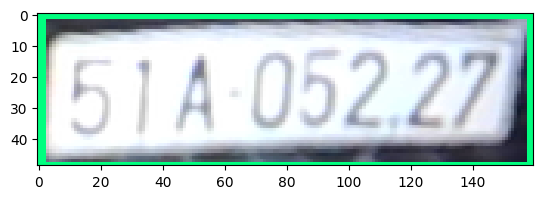

['5]4 052.27,']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


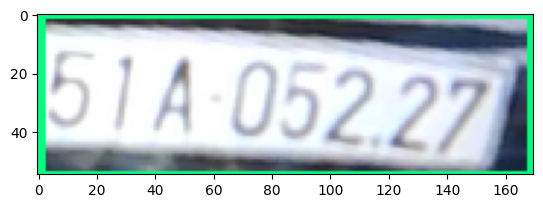

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['514 052,27']


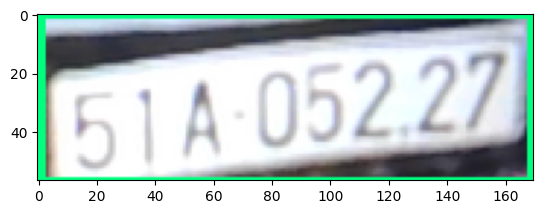

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['052.27', '6L4']


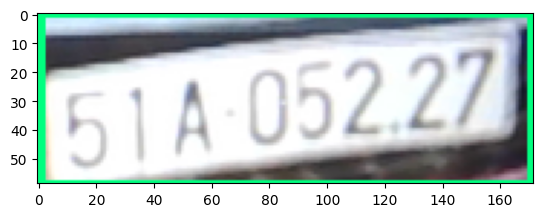

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['052.27}', '5LA']


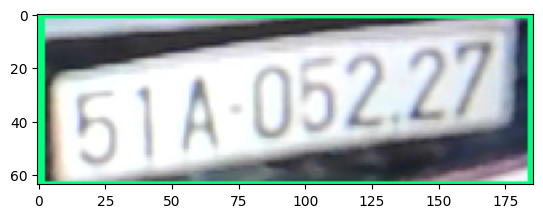

['614:', '27', '052']


In [32]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.5,
                agnostic_mode=False)
    
    try:
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        save_results(text, region, 'realtimeResults.csv', 'Detection_Images')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')